# Venuka Wijenayake

# Project Goal: Melbourne Tree Species Analysis for Conservation Efforts

## Objective
Conduct an in-depth analysis of the range of tree species in the Melbourne area, comparing historical data from pre-colonial times with current records. This study aims to identify changes in tree diversity, highlighting species that have diminished in numbers or variety. The ultimate goal is to provide evidence-based recommendations to local councils for tree planting programs, prioritizing species that need increased numbers to restore ecological balance and enhance urban biodiversity.

## Key Activities
- **Historical Data Collection:** Gather and analyze historical records and indigenous knowledge to identify the pre-colonial tree species composition.
- **Current Species Survey:** Utilize current botanical surveys, remote sensing data, and council records to compile an up-to-date list of tree species within Melbourne.
- **Comparative Analysis:** Compare historical and current data to identify trends, losses, or gains in tree species diversity.
- **Recommendation Development:** Based on the analysis, recommend tree species that need conservation focus and increased numbers in planting programs.

## Expected Outcome
A comprehensive report detailing changes in Melbourne's tree species over time, with actionable recommendations for local councils to inform future tree planting initiatives, aiming to restore lost tree species and enhance urban green spaces.

## Impact
This project not only contributes to the conservation of Melbourne’s botanical heritage but also supports urban sustainability efforts. By informing council tree planting programs with a focus on biodiversity, we can work towards a greener, more resilient Melbourne for future generations.


In [37]:
import requests
import pandas as pd
import os

def fetch_data(base_url, dataset, api_key, num_records=99, offset=0):
    all_records = []
    max_offset = 9900  # Maximum number of requests

    while True:
        # maximum limit check
        if offset > max_offset:
            break

        # Create API request URL
        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&api_key={api_key}'

        # Start request
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break

        # next cycle offset
        offset += num_records

    # DataFrame all data
    df = pd.DataFrame(all_records)
    return df

API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

Please enter your API key:  a0d28c08580df90345c0c34846cf94b614eb5071d598c3b885237828


In [38]:
# data set name
PRE_COLONIAL_TREES = 'pre-colonial-plant-list'

pre_colonial_trees = fetch_data(BASE_URL, PRE_COLONIAL_TREES, API_KEY)

pre_colonial_trees

species  \
0          Acacia mucronata var. longifolia   
1                          Acacia pycnantha   
2     Acacia verticillata var. verticillata   
3                           Acaena echinata   
4                      Acrotriche prostrata   
...                                     ...   
1062                     Hovea heterophylla   
1063                  Hydrocotyle foveolata   
1064                    Hydrocotyle muscosa   
1065                 Hydrocotyle tripartita   
1066               Hydrocotyle verticillata   

                                   common_name_s  certain  beach_and_dunes  \
0     Narrow-leaf Wattle, Variable Sallow Wattle      NaN              0.0   
1                                  Golden Wattle      1.0              0.0   
2                                  Prickly Moses      NaN              0.0   
3                                   Sheep's Burr      1.0              0.0   
4                          Trailing Ground-Berry      NaN              0.0   
...                                          ...      ...              ...   
1062       Common Hovea, Blue Bonnet, Bird's Eye      NaN              0.0   
1063                            Yellow Pennywort      NaN              0.0   
1064                             Mossy Pennywort      NaN              0.0   
1065                           Slender Pennywort      NaN              0.0   
1066          Common Pennywort, Shield Pennywort      NaN              0.0   

      saltmarsh  coastal_marshlands_and_brackish_flats  swamp_scrub  \
0           0.0                                    0.0          0.0   
1           0.0                                    0.0          1.0   
2           0.0                                    0.0          3.1   
3           0.0                                    0.0          0.0   
4           0.0                                    0.0          0.0   
...         ...                                    ...          ...   
1062        0.0                                    0.0          0.0   
1063        0.0                                    0.0          0.0   
1064        0.0                                    0.0          0.0   
1065        0.0                                    0.0          1.0   
1066        0.0                                    0.0          0.0   

      woodlands_and_heathlands_on_sand  \
0                                  0.0   
1                                  2.1   
2                                  3.1   
3                                  1.0   
4                                  0.0   
...                                ...   
1062                               2.1   
1063                               1.0   
1064                               0.0   
1065                               0.0   
1066                               0.0   

      woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges  \
0                                                   1.0               
1                                                   3.2               
2                                                   0.0               
3                                                   3.1               
4                                                   1.0               
...                                                 ...               
1062                                                3.1               
1063                                                1.0               
1064                                                0.0               
1065                                                0.0               
1066                                                0.0               

      grasslands_and_woodlands_on_fertile_plains  cliffs_and_escarpments  \
0                                            0.0                     0.0   
1                                            3.1                     2.1   
2                                            0.0                     0.0   
3                  

In [39]:
# data set name
CURRENT_TREES = 'trees-with-species-and-dimensions-urban-forest'

current_trees = fetch_data(BASE_URL, CURRENT_TREES, API_KEY)

current_trees

com_id      common_name                        scientific_name  \
0     1546404     River Sheoak               Casuarina cunninghamiana   
1     1038666       Claret Ash  Fraxinus angustifolia subsp. oxycarpa   
2     1439845          Kanooka                  Tristaniopsis laurina   
3     1070962      Spotted Gum                      Corymbia maculata   
4     1066252    River red gum               Eucalyptus camaldulensis   
...       ...              ...                                    ...   
9994  1287372  Chinaberry Tree                        Melia azedarach   
9995  1064175       Yellow Box                  Eucalyptus melliodora   
9996  1068611       Yellow Gum                  Eucalyptus leucoxylon   
9997  1065473    River red gum               Eucalyptus camaldulensis   
9998  1021915     London Plane                  Platanus x acerifolia   

              genus         family  diameter_breast_height year_planted  \
0         Casuarina  Casuarinaceae                     NaN         2013   
1          Fraxinus       Oleaceae                    26.0         1998   
2     Tristaniopsis      Myrtaceae                     NaN         2009   
3          Corymbia      Myrtaceae                    17.0         2007   
4        Eucalyptus      Myrtaceae                    19.0         2006   
...             ...            ...                     ...          ...   
9994          Melia      Meliaceae                     6.0         2008   
9995     Eucalyptus      Myrtaceae                     NaN         2005   
9996     Eucalyptus      Myrtaceae                     NaN         2006   
9997     Eucalyptus      Myrtaceae                     NaN         2006   
9998       Platanus    Platanaceae                    53.0         1997   

     date_planted age_description useful_life_expectency  \
0      2013-01-07            None                   None   
1      1998-11-09     Semi-Mature            11-20 years   
2      2009-09-08            None                   None   
3      2007-06-14     Semi-Mature            31-60 years   
4      2006-02-20     Semi-Mature              61+ years   
...           ...             ...                    ...   
9994   2008-06-16        Juvenile            31-60 years   
9995   2005-12-29            None                   None   
9996   2006-10-24            None                   None   
9997   2006-02-02            None                   None   
9998   1997-11-06          Mature            11-20 years   

      useful_life_expectency_value precinct located_in  uploaddate  \
0                              NaN     None       Park  2021-01-10   
1                             20.0     None       Park  2021-01-10   
2                              NaN     None     Street  2021-01-10   
3                             60.0     None     Street  2021-01-10   
4                             80.0     None     Street  2021-01-10   
...                            ...      ...        ...         ...   
9994                          60.0     None     Street  2021-01-10   
9995                           NaN     None       Park  2021-01-10   
9996                           NaN     None       Park  2021-01-10   
9997                           NaN     None       Park  2021-01-10   
9998                          20.0     None     Street  2021-01-10   

                                     coordinatelocation   latitude  \
0     {'lon': 144.97177997020128, 'lat': -37.8180699... -37.818070   
1     {'lon': 144.96069216093832, 'lat': -37.7815772... -37.781577   
2     {'lon': 144.9455194257097, 'lat': -37.79259845... -37.792598   
3     {'lon': 144.9421772126995, 'lat': -37.78013819... -37.780138   
4     {'lon': 144.92039340703647, 'lat': -37.7905765... -37.790577   
...                                                 ...        ...   
9994  {'lon': 144.96185487032108, 'lat': -37.8032135... -37.803214   
9995  {'lon': 144.9542655755877, 'lat': -37.78508023... -37.785080   
9996  {'lon': 144.94969237020163, 'la

## Step 1: Preprocess the Data

In [40]:
# Print available columns in the pre-colonial trees cleaned dataset
print("Available columns in pre-colonial trees dataset:")
print(pre_colonial_trees.columns.tolist())

# Print available columns in the current trees cleaned dataset
print("\nAvailable columns in current trees dataset:")
print(current_trees.columns.tolist())

Available columns in pre-colonial trees dataset:
['species', 'common_name_s', 'certain', 'beach_and_dunes', 'saltmarsh', 'coastal_marshlands_and_brackish_flats', 'swamp_scrub', 'woodlands_and_heathlands_on_sand', 'woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges', 'grasslands_and_woodlands_on_fertile_plains', 'cliffs_and_escarpments', 'river_banks_and_creeklines', 'wet_heathland', 'freshwater_wetland', 'saltwater_wetland', 'most_likely_occurrence', 'epbc_category_of_threat', 'ffg_extinction_risk', 'ffg_category_of_threat']

Available columns in current trees dataset:
['com_id', 'common_name', 'scientific_name', 'genus', 'family', 'diameter_breast_height', 'year_planted', 'date_planted', 'age_description', 'useful_life_expectency', 'useful_life_expectency_value', 'precinct', 'located_in', 'uploaddate', 'coordinatelocation', 'latitude', 'longitude', 'easting', 'northing', 'geolocation']


### Removing unwanted columns

In [41]:
# Import pandas library if you haven't already
import pandas as pd

# Columns to remove from the pre-colonial dataset
columns_to_remove_pre_colonial = ['epbc_category_of_threat', 'ffg_extinction_risk', 'ffg_category_of_threat', 'certain']

# Removing the specified columns from the pre-colonial trees dataset
pre_colonial_trees_cleaned = pre_colonial_trees.drop(columns=columns_to_remove_pre_colonial)

# Print available columns in the pre-colonial trees cleaned dataset after removal
print("Available columns in pre-colonial trees dataset after removal:")
print(pre_colonial_trees_cleaned.columns.tolist())

# Columns to remove from the current trees dataset
columns_to_remove_current = ['age_description', 'useful_life_expectency', 'useful_life_expectency_value', 'precinct', 'diameter_breast_height', 'coordinatelocation', 'easting', 'northing', 'geolocation']

# Removing the specified columns from the current trees dataset
current_trees_cleaned = current_trees.drop(columns=columns_to_remove_current)

# Print available columns in the current trees cleaned dataset after removal
print("\nAvailable columns in current trees dataset after removal:")
print(current_trees_cleaned.columns.tolist())

Available columns in pre-colonial trees dataset after removal:
['species', 'common_name_s', 'beach_and_dunes', 'saltmarsh', 'coastal_marshlands_and_brackish_flats', 'swamp_scrub', 'woodlands_and_heathlands_on_sand', 'woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges', 'grasslands_and_woodlands_on_fertile_plains', 'cliffs_and_escarpments', 'river_banks_and_creeklines', 'wet_heathland', 'freshwater_wetland', 'saltwater_wetland', 'most_likely_occurrence']

Available columns in current trees dataset after removal:
['com_id', 'common_name', 'scientific_name', 'genus', 'family', 'year_planted', 'date_planted', 'located_in', 'uploaddate', 'latitude', 'longitude']


In [42]:
# Print available columns in the pre-colonial trees cleaned dataset
print("Available columns in pre-colonial trees dataset:")
print(pre_colonial_trees_cleaned.columns.tolist())

# Print available columns in the current trees cleaned dataset
print("\nAvailable columns in current trees dataset:")
print(current_trees_cleaned.columns.tolist())

Available columns in pre-colonial trees dataset:
['species', 'common_name_s', 'beach_and_dunes', 'saltmarsh', 'coastal_marshlands_and_brackish_flats', 'swamp_scrub', 'woodlands_and_heathlands_on_sand', 'woodlands_and_forests_on_sedimentary_hills_valleys_and_ridges', 'grasslands_and_woodlands_on_fertile_plains', 'cliffs_and_escarpments', 'river_banks_and_creeklines', 'wet_heathland', 'freshwater_wetland', 'saltwater_wetland', 'most_likely_occurrence']

Available columns in current trees dataset:
['com_id', 'common_name', 'scientific_name', 'genus', 'family', 'year_planted', 'date_planted', 'located_in', 'uploaddate', 'latitude', 'longitude']


In [43]:
# Rename "Scientific Name" column to "Species" in the current trees dataset
current_trees_renamed = current_trees_cleaned.rename(columns={"scientific_name": "species"})

# Verify the column renaming by printing the columns of the updated DataFrame
print("Available columns in current trees dataset after renaming:")
print(current_trees_renamed.columns.tolist())


Available columns in current trees dataset after renaming:
['com_id', 'common_name', 'species', 'genus', 'family', 'year_planted', 'date_planted', 'located_in', 'uploaddate', 'latitude', 'longitude']


In [44]:
# Specify the path and file name for the CSV file you want to create
file_path = 'C:/Users/venuk/Downloads/current_trees_renamed.csv'

# Export the DataFrame to a CSV file
current_trees_renamed.to_csv(file_path, index=False)

# If you need to provide a link to download the file (in a Jupyter environment, for example)
print(f"Data exported to {file_path}")


Data exported to C:/Users/venuk/Downloads/current_trees_renamed.csv


In [45]:
# Specify the path and file name for the CSV file you want to create
file_path = 'C:/Users/venuk/Downloads/pre_colonial_trees_cleaned.csv'

# Export the DataFrame to a CSV file
pre_colonial_trees_cleaned.to_csv(file_path, index=False)

# If you need to provide a link to download the file (in a Jupyter environment, for example)
print(f"Data exported to {file_path}")


Data exported to C:/Users/venuk/Downloads/pre_colonial_trees_cleaned.csv


# Analysis & Visualization

## 1. Historical vs. Current Species Diversity (Venn Diagram)

In [79]:
!pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable


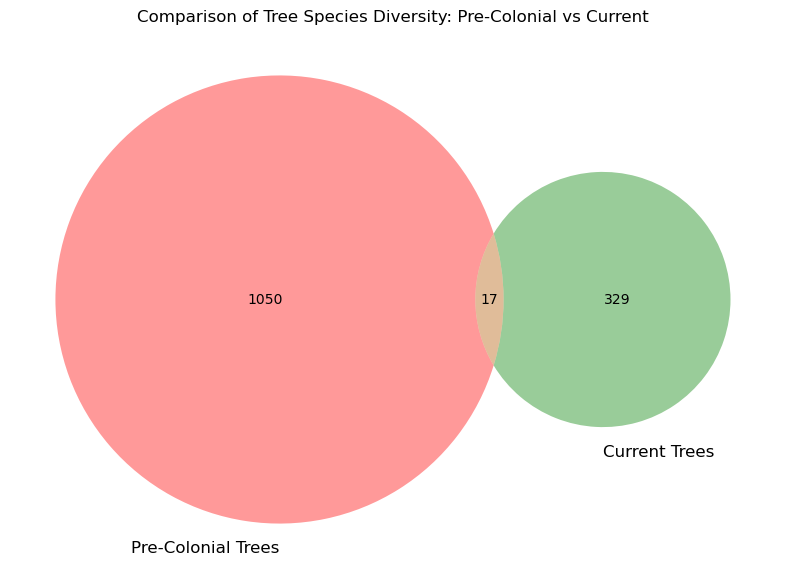

In [80]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Extracting species lists from both datasets
pre_colonial_species = set(pre_colonial_trees_cleaned['species'].unique())
current_species = set(current_trees_renamed['species'].unique())

# Creating the Venn diagram
plt.figure(figsize=(10, 7))
venn2([pre_colonial_species, current_species], ('Pre-Colonial Trees', 'Current Trees'))
plt.title('Comparison of Tree Species Diversity: Pre-Colonial vs Current')
plt.show()

## 2. Change in Species Abundance Over Time

In [81]:
# Extract species sets
pre_colonial_species = set(pre_colonial_trees_cleaned['species'].unique())
current_species = set(current_trees_renamed['species'].unique())

# Determine shared and unique species
shared_species = pre_colonial_species.intersection(current_species)
lost_species = pre_colonial_species.difference(current_species)
gained_species = current_species.difference(pre_colonial_species)

# Print results
print(f"Shared Species: {len(shared_species)}")
print(f"Lost Species: {len(lost_species)}")
print(f"Gained Species: {len(gained_species)}")


Shared Species: 17
Lost Species: 1050
Gained Species: 329


## 3. Geographical Distribution of Trees (Map Visualization)

In [82]:
import folium

# Initialize a map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Adding tree locations to the map
for idx, row in current_trees_renamed.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=1,
                        color='green',
                        fill=True,
                        fill_color='green').add_to(melbourne_map)

# Display the map
melbourne_map

## 4. Time-Series Analysis of Tree Planting

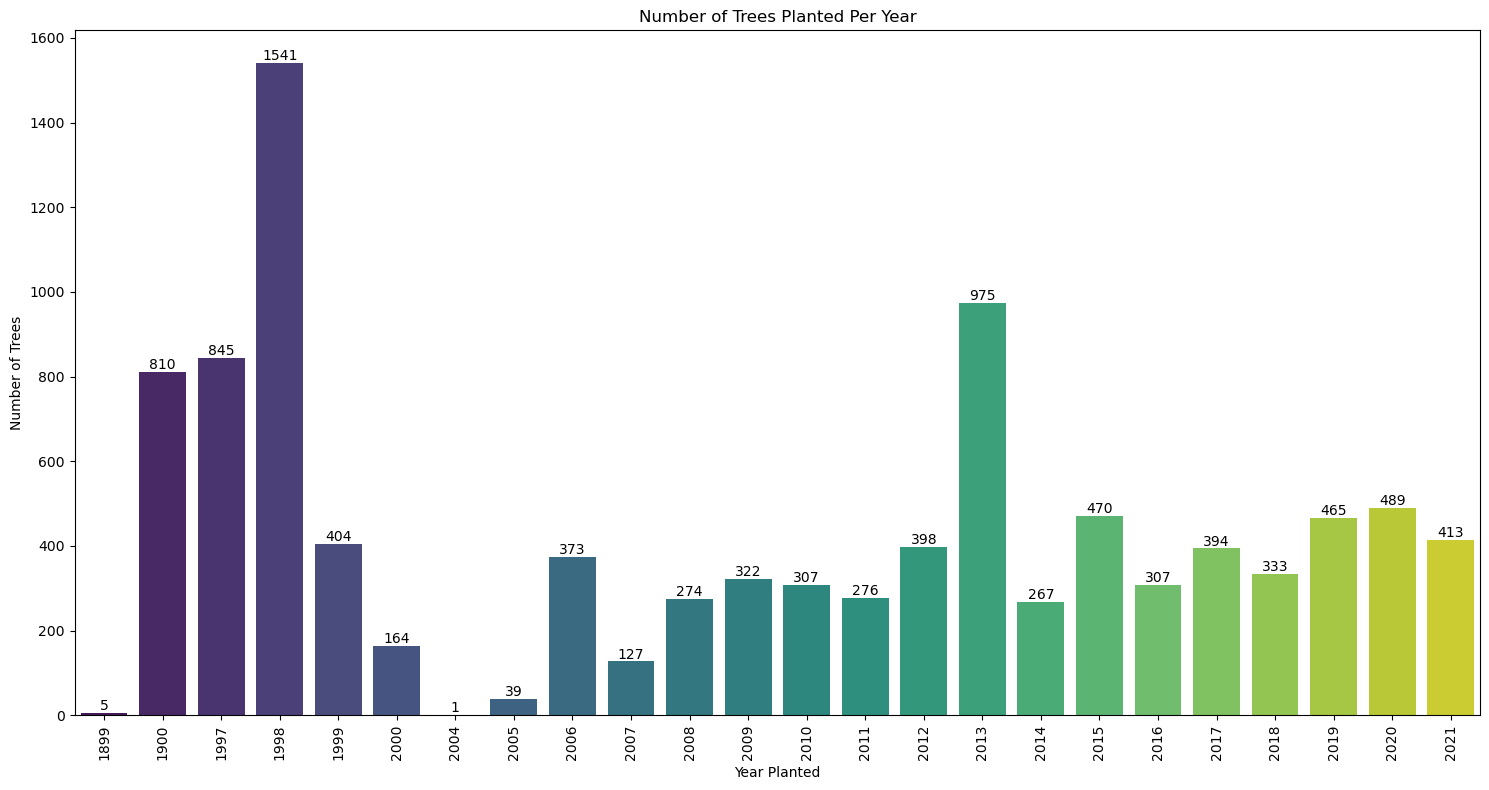

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'year_planted' column is treated as integers
current_trees_renamed['year_planted'] = pd.to_numeric(current_trees_renamed['year_planted'], errors='coerce')

# Filtering out any rows where 'year_planted' might be zero or invalid
current_trees_filtered = current_trees_renamed[current_trees_renamed['year_planted'] > 0]

# Create the plot
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='year_planted', data=current_trees_filtered, palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Trees Planted Per Year')
plt.ylabel('Number of Trees')
plt.xlabel('Year Planted')

# Adding counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## 5. Habitat Analysis for Pre-Colonial Species

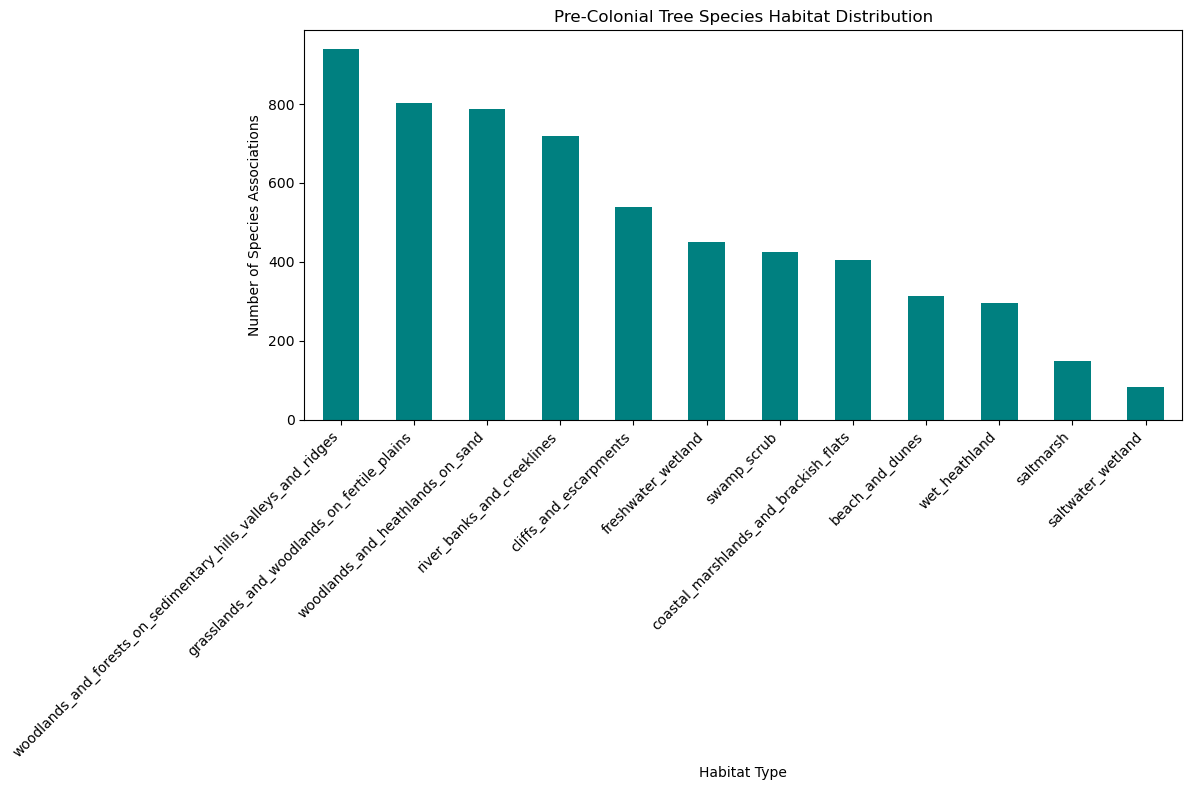

In [84]:
import matplotlib.pyplot as plt

# Summing up habitat data
habitat_data = pre_colonial_trees_cleaned.drop(columns=['species', 'common_name_s', 'most_likely_occurrence'])
habitat_totals = habitat_data.sum().sort_values(ascending=False)

# Plotting habitat data
plt.figure(figsize=(12, 8))  # Adjusted figure size for better fit
habitat_totals.plot(kind='bar', color='teal')
plt.title('Pre-Colonial Tree Species Habitat Distribution')
plt.ylabel('Number of Species Associations')
plt.xlabel('Habitat Type')
plt.xticks(rotation=45, ha='right')  # Adjust label alignment and rotation
plt.tight_layout()  # Adjust layout to make room for label text
plt.show()

## 6. Ecological Dynamics of Tree Species in Parks vs. Streets in Melbourne

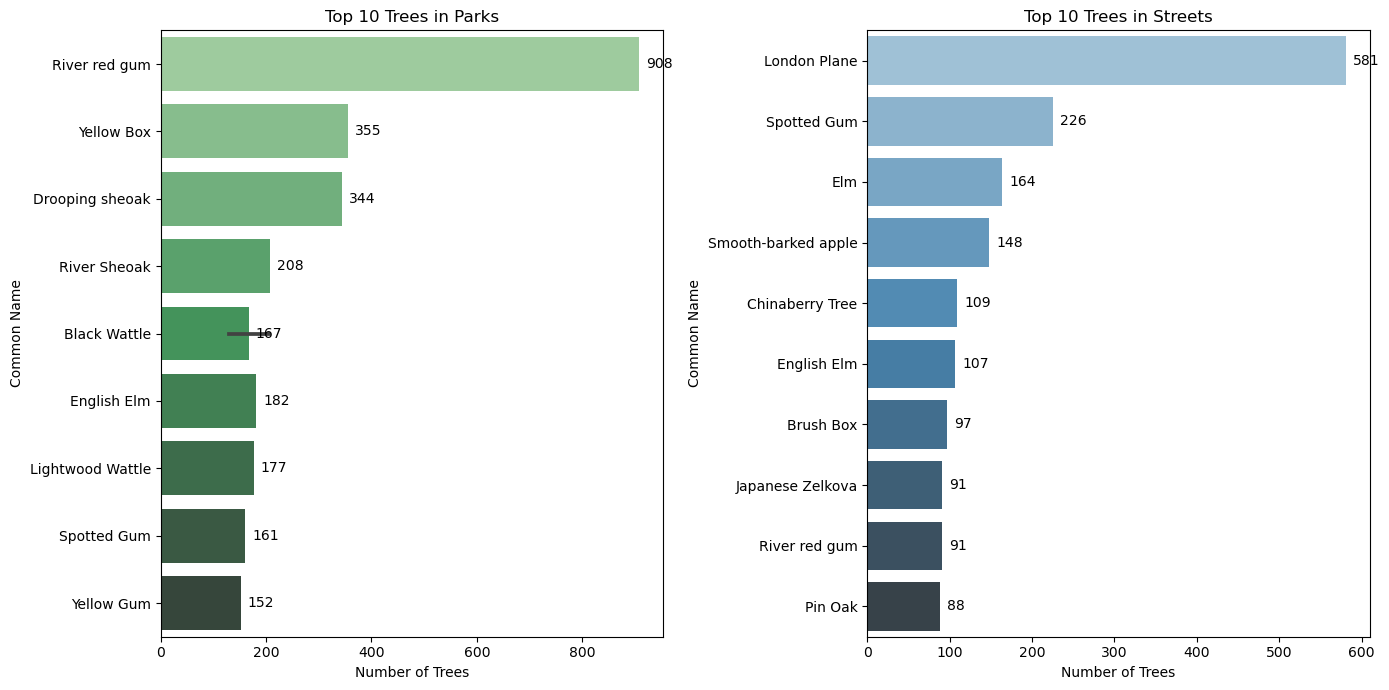

Trees in Parks:
                     common_name                                  species  count
                   River red gum                 Eucalyptus camaldulensis    908
                      Yellow Box                    Eucalyptus melliodora    355
                 Drooping sheoak               Allocasuarina verticillata    344
                    River Sheoak                 Casuarina cunninghamiana    208
                    Black Wattle                          Acacia mearnsii    205
                     English Elm                            Ulmus procera    182
                Lightwood Wattle                           Acacia implexa    177
                     Spotted Gum                        Corymbia maculata    161
                      Yellow Gum                    Eucalyptus leucoxylon    152
                    Black Wattle                       Acacia melanoxylon    129
                  Sweet Bursaria                         Bursaria spinosa    120
            

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate trees into parks and streets
trees_in_parks = current_trees_renamed[current_trees_renamed['located_in'] == 'Park']
trees_in_streets = current_trees_renamed[current_trees_renamed['located_in'] == 'Street']

# Focus on common names and species for simplicity
parks_info = trees_in_parks[['common_name', 'species']].value_counts().reset_index(name='count')
streets_info = trees_in_streets[['common_name', 'species']].value_counts().reset_index(name='count')

# Visualization of Species Distribution with Counts
plt.figure(figsize=(14, 7))

# Trees in Parks
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='count', y='common_name', data=parks_info.head(10), palette='Greens_d')
plt.title('Top 10 Trees in Parks')
plt.xlabel('Number of Trees')
plt.ylabel('Common Name')
# Add counts above the bars
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Trees in Streets
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='count', y='common_name', data=streets_info.head(10), palette='Blues_d')
plt.title('Top 10 Trees in Streets')
plt.xlabel('Number of Trees')
plt.ylabel('Common Name')
# Add counts above the bars
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

# Print the lists of trees in parks and streets
print("Trees in Parks:")
print(parks_info.to_string(index=False))

print("\nTrees in Streets:")
print(streets_info.to_string(index=False))


In [5]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">{Use Case Name}</div>

<div class="usecase-authors"><b>Authored by: </b> {Author/s}</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```